In [68]:
# 사용할 모듈 import 하기
import requests
import matplotlib.pyplot as plt
import torch
import numpy as np

In [69]:
# 데이터 불러오기

iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
r = requests.get(iris_url)
f=open('iris.data','wb') #request 는 binary 형태로 들어와서
f.write(r.content)  #r에 들어있는 내용을 iris.data에 쓰기 
f.close()


vectors=[]
answers=[]

with open('iris.data','r') as f:
  for line in f:
    one_line=line.strip().split(",")
    try:
      vectors.append([float(item) for item in one_line[:4]])
      answers.append(one_line[-1])
    except: pass

species={a:i for i,a in enumerate(set(answers))}
species

{'Iris-setosa': 2, 'Iris-versicolor': 0, 'Iris-virginica': 1}

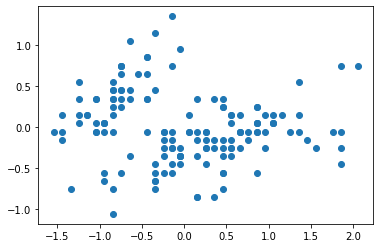

In [71]:
#좌표 축 이동
X = torch.FloatTensor(vectors)
z = (X-torch.mean(X, axis=0))

plt.scatter(z[:,0],z[:,1])
plt.show()

In [91]:
# 분산을 최대로 하는 w벡터 찾기

def findPC(z):
  dim=z.shape[1] #벡터 차원
  w=torch.randn(dim)
  w/=(torch.dot(w,w)**0.5)

  lr=0.1

  for epoch in range(1001):
    w.requires_grad_(True)
    var=torch.mean((z*w).sum(dim=1)**2)
    var.backward(retain_graph=True)

    with torch.no_grad():
      w+=lr*w.grad
      w/=(torch.dot(w,w)**0.5)


  return w,var.item()

In [92]:
#PCA
#순서대로 주성분 찾기

def PCA(z,n):
  w_list=[]
  v_list=[]
  for _ in range(n):
    w,v=findPC(z)
    w_list.append(w)
    v_list.append(v)

    z=z-(z@w.view(-1,1))*w #@: matrix 곱셈

  return w_list,v_list

In [93]:
 # 회전축 돌리기
 
def transform(Z, W):
   return Z @ torch.stack(W).T

PCA 구해보기

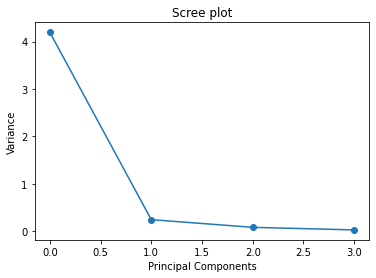

In [94]:
W,V=PCA(z,4)
tr=transform(z, W)

#Scree plot 그리기
plt.title("Scree plot")
plt.xlabel("Principal Components")
plt.ylabel("Variance")
plt.plot(range(4),V,"o-")
plt.show()


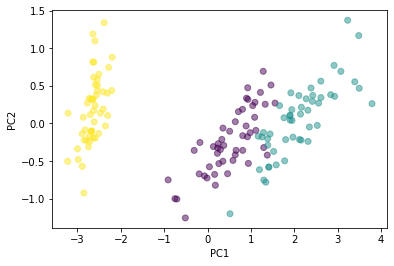

In [95]:
# 변환된 그래프: PC1과 PC2를 축으로 하는 그래프 그리기

plt.xlabel("PC1")
plt.ylabel("PC2")

torch_to_numpy=tr.detach().numpy()
plt.scatter(torch_to_numpy[:, 0], torch_to_numpy[:,1], c=[species[a] for a in answers], alpha=0.5)
plt.show()